In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import scipy

## Задача 1. Осьминог Пауль (2 балла)


В период с 2008 по 2010 год в Германии жил Осьминог Пауль, который был известен тем, что мог предсказывать результаты матчей с участием сборной Германии.     
   
В таблице ниже вы можете видеть результаты его предсказаний: 


<a href="https://ibb.co/VWnc5yG"><img src="https://i.ibb.co/QFS3tBV/image.jpg" alt="image" border="0"></a>

Если считать, что случайным образом мы угадывали ли бы 50% матчей, то можно ли утверждать, что осьминог Пауль был талантливым экстрасенсом со способностями к предсказаниям?

Сформулируем статистические гипотезы:

H0: p = 1/2 (вероятность угадывания - 50%, то есть оказывается прав так же, как и наугад)

H1: p > 1/2 (вероятность угадывания больше 50%, то есть выбирает правильный исход чаще, чем наугад)

Будем проверять статистические гипотезы на уровне значимости 5%

Для проверки используем биноминальный тест, так как у нас представлена всего одна выборка, имеющая распределение Бернулли (где 0 - не угадал, 1 - угадал)

In [2]:
### ╰( ͡° ͜ʖ ͡° )つ──☆ сотворите статистическую магию
stats.binom_test(11, 13, 0.5, alternative = 'greater')

0.01123046875

p-value < 0.05 => на уровне значимости 5% мы отвергаем нулевую гипотезу H0 в пользу альтернативной H1 о том, что осьминог Пауль выбирает правильный исход чаще, чем наугад. Следовательно с 95% доверительной вероятностью Пауль действительно является талантливым экстрасенсом со способностями к предсказаниям.

## Задача 2.  Корм и котики (2 балла)

    
Новый корм для котиков рекламируется с помощью рекламного баннера. Отдел маркетинга разработал для рекламы новый баннер. Они считают, что он более красивый. Перед фирмой возникла необходимость проверить какой из двух баннеров лучше.

Для этого была создана специальная веб-форма. В этой веб-форме людям по очереди демонстрировали оба баннера и просили поставить лайк, если баннер нравится человеку. Если человеку нравятся оба баннера, он может поставить два лайка. Если ему не нравится ни один баннер, он может не ставить лайки вовсе. Собранные в конечном итоге данные находятся в табличке.

Можно ли утверждать, что оба баннера одинаково хороши? Сформулируйте статистическую гипотезу для проверки того, что оба баннера выбирают одинаково часто. Проверьте ее и сделайте выводы.


In [3]:
### ╰( ͡° ͜ʖ ͡° )つ──☆ сотворите статистическую магию
dfbanners = pd.read_csv('banner_click_stat.csv', sep='\t', header=None)
dfbanners.head(5) #убедимся что всё сработало корректно

,0,1
0,0,0
1,1,1
2,0,0
3,0,0
4,0,0


Сформулируем статистические гипотезы:

H0: m1 - m2 = 0 (оба баннера одинаково часто нравятся пользователям)

H1: m1 - m2 != 0 (баннеры неодинаково нравятся пользователям)

Проверять гипотезы будем на уровне значимости 5%.

Чтобы проверить это, воспользуемся критерием знаков, проверяющая гипотезу о равенстве нулю медианы разности, так как наши 2 выборки (имеющие распределение Бернулли) связаны между собой (один и тот же пользователь голосует за понравившийся баннер/баннеры)

In [4]:
from statsmodels.stats.descriptivestats import sign_test
banner_1 = np.array(dfbanners[0])
banner_2 = np.array(dfbanners[1])
sign_test(banner_1 - banner_2)

(-8.0, 0.005222879350185395)

P.value оказался равным 0.005. P-value < 0.05, следовательно на уровне значимости 5% мы отвергаем нулевую гипотезу H0 в пользу альтернативной H1 о том, что баннеры неодинаково нравятся пользователям. Тогда с доверительной вероятностью 95% один из предложенных баннеров нравится пользователям больше.

## Задача 3. Немного АВ-тестов (3 балла)
## Игра Cookie Cat

В этом задании мы поработаем с данными Cookie Cats - популярной игры-головоломки, которую разработала компания Tactile Entertainment. В этой игре игрок должен соединять одинаковые элементы в ряд, чтобы очистить поле и выиграть уровень. 

<p style="align: center;"><img align=center src="https://i.ytimg.com/vi/iPxZIp0cbJE/maxresdefault.jpg"  width=500></p>
 
 
<p style="align: center;"><img align=center src="https://s3.amazonaws.com/assets.datacamp.com/production/project_184/img/cc_gates.png"  width=500></p>


По мере прохождения уровней перед игроками появляются ворота, открытия которых нужно ждать какое-то время или пропускать их, совершая покупки в приложении. С точки зрения создателей эти ворота повышают интерес к игре и стимулируют к вложению денег в игру.


Но у создателей появляется важный вопрос: **где лучше всего ставить ворота?**
Первоначально первые ворота были размещены на уровне 30. Однако есть гипотеза, что лучше переместить их на уровень 40. В этом задании вам предлагается проанализировать результаты AB-теста, в котором создатели переместили первые ворота в Cookie Cats с 30 уровня на уровень 40. 

**Данные получены от 90 189 игроков, которые установили игру во время проведения AB-теста. Переменные:**

* `userid` - уникальный номер, идентифицирующий каждого игрока.

* `version` - был ли игрок помещен в контрольную группу (gate_30 - ворота на уровне 30) или в тестовую группу (gate_40 - ворота на уровне 40).

* `sum_gamerounds` - количество игровых раундов, сыгранных игроком в течение первой недели после установки
* `retention_1` - вернулся ли игрок в игру через 1 день после установки
* `retention_7` - вернулся ли игрок в игру через 7 дней после установки

Когда игрок устанавливал игру, ему случайным образом назначали `gate_30` или `gate_40`.

In [5]:
dfcookie = pd.read_csv('cookie_cats.csv')
dfcookie.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


In [6]:
dfcookie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90189 entries, 0 to 90188
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   userid          90189 non-null  int64 
 1   version         90189 non-null  object
 2   sum_gamerounds  90189 non-null  int64 
 3   retention_1     90189 non-null  bool  
 4   retention_7     90189 non-null  bool  
dtypes: bool(2), int64(2), object(1)
memory usage: 2.2+ MB


### Вопрос 1: есть ли зависимость между возвращаемостью игроков и расположением ворот?

Сформулируем статистические гипотезы:

H0: p = 0 (зависимость переменных статистически не значима, переменные независыми)

H1: p1 != 0 (зависимость переменных статистически значима, переменные зависимы)

Проверять гипотезы будем на уровне значимости 5%

Чтобы проверить это, воспользуемся критерием независимости Хи-квадрат Пирсона, позволяющий проверить наличие взаимосвязи между двумя категориальными переменными.

#### 1.1 Проверьте гипотезу для возвращения через день

In [7]:
### ╰( ͡° ͜ʖ ͡° )つ──☆ сотворите статистическую магию
back1 = dfcookie.groupby('version')['retention_1'].value_counts().unstack()
stats.chi2_contingency(back1, correction=False)

(3.182963657512031,
 0.07440965529692188,
 1,
 array([[24799.13514952, 19900.86485048],
        [25236.86485048, 20252.13514952]]))

В случае возвращения через день, p-value оказался равен 0.07. P-value > 0.05 следовательно мы не отвергаем нулевую гипотезу H0 об отсутствии зависимости переменных. С доверительной вероятностью 95%, связи между возвращением через день и расположением ворот нет.

#### 2.2 Проверьте гипотезу для возвращения через семь дней

In [8]:
### ╰( ͡° ͜ʖ ͡° )つ──☆ сотворите статистическую магию
back7 = dfcookie.groupby('version')['retention_7'].value_counts().unstack()
stats.chi2_contingency(back7, correction=False)

(10.013167328688969,
 0.0015542499756142805,
 1,
 array([[36382.90257127,  8317.09742873],
        [37025.09742873,  8463.90257127]]))

В случае же с возвращением через день, p-value оказался равным 0.0016. P-value < 0.05 следовательно мы отвергаем нулевую гипотезу H0 в пользу альтернативной H1 о том, что зависимость переменных статистичски значима. С доверительной вероятностью 95%, связь между возвращением через неделю и расположением ворот есть.

### Вопрос 2: Отличается ли среднее количество раундов в группах gate_40 и gate_30?

Для начала проверим,  является ли распределение нормальным. Для этого посмотрим на его график.

<AxesSubplot:xlabel='sum_gamerounds', ylabel='Density'>

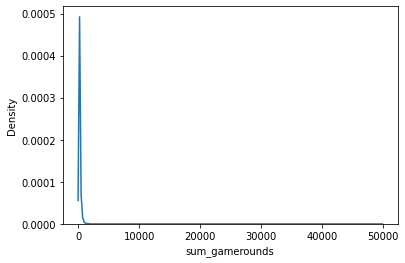

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline 

sns.kdeplot(dfcookie['sum_gamerounds'])

In [10]:
dfcookie['new_sum']=dfcookie['sum_gamerounds']

График имеет странное распределение и явно указывает на то, что эта переменная не распределна по нормальному закону. Огромный хвост справа указывает на то, что имеются очень большие выбросные значения. Почистим их и проверим на нормальность еще раз.

<AxesSubplot:xlabel='new_sum', ylabel='Density'>

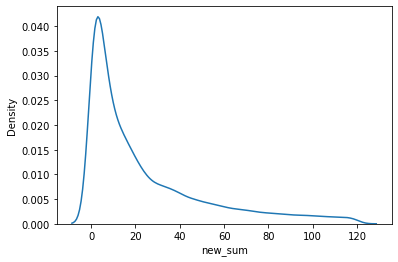

In [11]:
for x in ['new_sum']:
    q3,q1 = np.percentile(dfcookie.loc[:,x],[75,25]) #https://pythobyte.com/detection-removal-outliers-in-python-adaa857e/
    iqr = q3-q1

    max = q3+(1.5*iqr)
    min = q1-(1.5*iqr)

    dfcookie.loc[dfcookie[x] < min,x] = np.nan
    dfcookie.loc[dfcookie[x] > max,x] = np.nan
dfcookiedrop = dfcookie[['new_sum', 'version']].dropna()
sns.kdeplot(dfcookiedrop['new_sum'])

In [12]:
dfcookiedrop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80012 entries, 0 to 90188
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   new_sum  80012 non-null  float64
 1   version  80012 non-null  object 
dtypes: float64(1), object(1)
memory usage: 1.8+ MB


Этот график куда больше похож на график нормального распределение, однако всё равно не является им. С другой стороны, согласно Центральной Предельной теореме, при очень больших выборках мат. ожидение стремится к нормальному распределению. Исходя из этого, мы можем использовать для проверки Т-критерий для двух независимых выборок.

Сформулируем статистические гипотезы:

H0: m1 = m2 (среднее количество раундов в группах равны)

H1: m1 != m2 (среднее количество раундов в группах различаются)

Гипотезы будем проверять на уровне значимости 5%


In [13]:
### ╰( ͡° ͜ʖ ͡° )つ──☆ сотворите статистическую магию
rounds_g40 = np.array(dfcookiedrop[dfcookiedrop['version']=='gate_40']['new_sum'])
rounds_g30 = np.array(dfcookiedrop[dfcookiedrop['version']=='gate_30']['new_sum'])

stats.ttest_ind(rounds_g40, rounds_g30, equal_var=False, alternative='two-sided')

Ttest_indResult(statistic=0.3468210518530167, pvalue=0.7287266726945119)

P.value оказался равным 0.729. P-value > 0.05 следовательно мы не отвергаем нулевую гипотезу о том, что среднее количество раундав в группах gate_40 и gate_30 равны. С доверительной вероятностью 95%, количество сыгранных раундов для разных ворот не отличается

### Вопрос 3: Отличается ли медианное количество раундов в группах gate_40 и gate_30?

Сформулируем статистические гипотезы:

H0: med1 = med2 (медианное количество раундов в группах gate_40 И gate_30 равны)

H1: med != med2 (медианное количество раундов в группах различается)

Проверять гипотезы будем на уровне значимости 5%

Для проверки используем критерий Манна-Уитни (позволяющий проверить гипотезу о равестве медиан), т.к. выборки независимы между собой

In [14]:
### ╰( ͡° ͜ʖ ͡° )つ──☆ сотворите статистическую магию
rounds_g40 = np.array(dfcookie[dfcookie['version']=='gate_40']['sum_gamerounds'])
rounds_g30 = np.array(dfcookie[dfcookie['version']=='gate_30']['sum_gamerounds'])

stats.mannwhitneyu(rounds_g40, rounds_g30, alternative='two-sided')

MannwhitneyuResult(statistic=1009027049.5, pvalue=0.05020880772044255)

P-value оказался равен 0.0502. Значение p-value оказалось очень близким к 0.05, однако всё равно больше, соответственно мы не отвергаем нулевую гипотезу H0 о том, что медианное количество раундов в группах gate_40 и gate_30 равны. С доверительной вероятностью 95% распределения раундов для разных групп одинаковое.

## Задача 4: Время покемонов (3 балла)

В данной задаче вам будет необходимо проанализировать различные характеристики покемонов и сравнить их между собой

<p style="align: center;"><img align=center src="https://proprikol.ru/wp-content/uploads/2020/11/kartinki-pokemonov-2.jpg"  width=500></p>

Покемоны - это маленькие существа, которые сражаются друг с другом на соревнованиях. Все покемоны имеют разные характеристики (сила атаки, защиты и т. д.) и относятся к одному или двум так называемым классам (вода, огонь и т. д.). Профессор Оук является изобретателем Pokedex, портативного устройства, которое хранит информацию обо всех существующих покемонах. Как его ведущий специалист по данным, Вы только что получили от него запрос с просьбой осуществить аналитику данных на всех устройствах Pokedex.

### Описание данных

Профессор Оук скопировал все содержимое память одного устройства Pokedex, в результате чего получился набор данных, с которым Вы будете работать в этой задаче. В этом файле каждая строка представляет характеристики одного покемона:

* pid: Numeric - ID покемона
* HP: Numeric - Очки здоровья
* Attack: Numeric - Сила обычной атаки
* Defense: Numeric - Сила обычной защиты
* Sp. Atk: Numeric - Сила специальной атаки
* Sp. Def: Numeric - Сила специальной защиты
* Speed: Numeric - Скорость движений
* Legendary: Boolean - «True», если покемон редкий
* Class 1: Categorical - Класс покемона
* Class 2: Categorical - Класс покемона

In [15]:
dfpokemon = pd.read_csv('pokemon.csv')
dfpokemon.head()

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,False


In [16]:
dfpokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   pid        800 non-null    int64 
 1   Name       799 non-null    object
 2   Class 1    800 non-null    object
 3   Class 2    414 non-null    object
 4   HP         800 non-null    int64 
 5   Attack     800 non-null    int64 
 6   Defense    800 non-null    int64 
 7   Sp. Atk    800 non-null    int64 
 8   Sp. Def    800 non-null    int64 
 9   Speed      800 non-null    int64 
 10  Legendary  800 non-null    bool  
dtypes: bool(1), int64(7), object(3)
memory usage: 63.4+ KB


### Вопрос 1

Профессор Оук подозревает, что покемоны в классе `grass` имеют более сильную обычную атаку, чем у покемонов в классе `rock`. Проверьте, прав ли он, и убедите его в своем выводе статистически. 

<AxesSubplot:xlabel='Attack', ylabel='Density'>

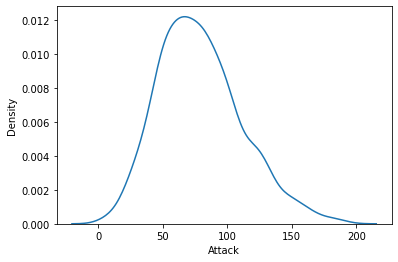

In [17]:
sns.kdeplot(dfpokemon['Attack'])

Как видно по графику, переменная имеет распределение, близкое к нормальному.

Сформулируем статистические гипотезы:

H0: m1 = m2 (среднее значение атаки для классов равны)

H1: m1>m2 (среднее значение атаки для класса grass выше, чем для класса rock)

Гипотезы будем проверять на уровне значимости 5%

Для этого используем Т-критерий, так как переменная распределена по нормальному закону, выборки независимые.

In [18]:
### ╰( ͡° ͜ʖ ͡° )つ──☆ сотворите статистическую магию
atgrass = np.array(dfpokemon[(dfpokemon['Class 1']=='Grass')|(dfpokemon['Class 2']=='Grass')]['Attack'])
atrock = np.array(dfpokemon[(dfpokemon['Class 1']=='Rock')|(dfpokemon['Class 2']=='Rock')]['Attack'])

stats.ttest_ind(atgrass, atrock, equal_var=False, alternative='greater')

Ttest_indResult(statistic=-3.315895277064196, pvalue=0.9993424279122299)

Значение p-value получилось равное 0.999. p-value > 0.05 следовательно мы не отвергаем нашу гипотезу о том, что среднее значение атаки для классов grass и rock равны. Тогда с 95% доверительной вероятностью Профессор Оук не прав и покемоны grass не сильнее покемонов rock.

### Вопрос 2

Также профессор Оук очень хочет проверить, правда ли нет значимой разницы между силой обычной атаки и силой обычной защиты у покемонов. Помогите ему и ответьте на вопрос, подтвердив свои выводы с помощью проверки статистических гипотез

<AxesSubplot:xlabel='Defense', ylabel='Density'>

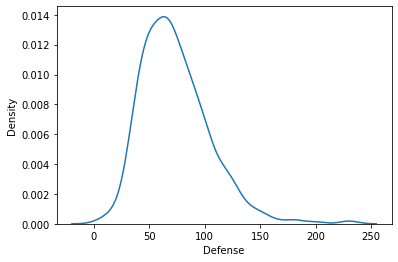

In [19]:
sns.kdeplot(dfpokemon['Defense'])

Переменная Defense тоже имеет распределение, близкое к нормальному

Сформулируем статистические гипотезы:

H0: m1 = m2 (сила обычной атаки равна силе обычной защиты у покемонов, то есть значимой разницы между ними нет)

H1: m1 != m2 (сила обычной атаки и обычной защиты не равны, то есть значимая разница есть)

Проверять гипотезы будем на уровне значимости 5%

Для проверки используем T-тест для независимых выборок, так как переменные распределены по нормальному закону.

In [20]:
### ╰( ͡° ͜ʖ ͡° )つ──☆ сотворите статистическую магию

attack = np.array(dfpokemon['Attack'])
defense = np.array(dfpokemon['Defense'])

stats.ttest_ind(attack, defense, equal_var=False, alternative='two-sided')

Ttest_indResult(statistic=3.2417640740423126, pvalue=0.0012124374824544375)

P-value оказался равен 0.001. p-value < 0.05 следовательно мы отвергаем нулевую гипотезу H0 в пользу альтернативной H1 о том, что сила обычной атаки и обычной защиты у покемонов не равны. С доверительной вероятностью 95% существует значимая разница между силой обычной атаки и защиты.

### Вопрос 3

И последний вопрос, который мучает профессора Оука: правда ли, что средняя скорость покемонов превышает 66.6 ? Сформулируйте подходящие гипотезы и помогите профессору Оуку, ответив на вопрос.

<AxesSubplot:xlabel='Speed', ylabel='Density'>

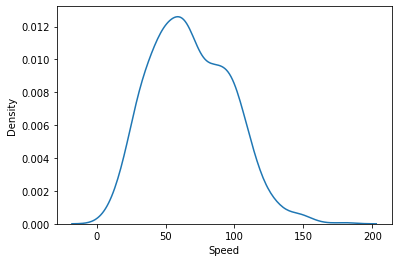

In [74]:
sns.kdeplot(dfpokemon['Speed'])

Как видно по графику, переменная Speed распределена не по нормальному закону, поэтому для анализа будем использовать непараметрические критерии, а для сравнения будем брать не средние, а медианные значения.

Сформулируем статистические гипотезы:

H0: m = 66.6 (средняя(медианная) скорость покемонов равна 66.6)

H1: m > 66.6 (средняя(медианная) скорость покемонов выше 66.6)

Проверять гипотезы будем на уровне значимости 5%

Для этого используем критерий знаков, проверяющий гипотезу о равенстве медианы заданному значению

In [21]:
### ╰( ͡° ͜ʖ ͡° )つ──☆ сотворите статистическую магию
speed = np.array(dfpokemon['Speed'])

statistic, pval = sign_test(speed, mu0=66.6)
print(statistic, pval)

-14.0 0.33978752327776385


In [22]:
pval/2 # т.к. наша гипотеза односторонняя, а sign_test проверяет двустороннюю, делим p-value на 2

0.16989376163888192

P-value окказалось равно 0.169. P-value > 0.05, следовательно мы не отвергаем нашу нулевую гипотезу о том, что средняя скорость равна 66.6. Таким образом, с доверительной вероятность 95% средняя скорость покемонов не превышает 66.6